<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning2020/blob/main/plot_digits_classif_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%matplotlib inline


Simple visualization and classification of the digits dataset
=============================================================

Plot the first few samples of the digits dataset, then do a simple MLP classification

*Marcin Wolter*



In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
#X_train, X_test = X[:60000], X[60000:]
#y_train, y_test = y[:60000], y[60000:]

# split the data into training and validation sets
init = np.random.randint(0,1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=init, train_size=60000)




Plot the data: images of digits
-------------------------------

Each data in a 28x28 image



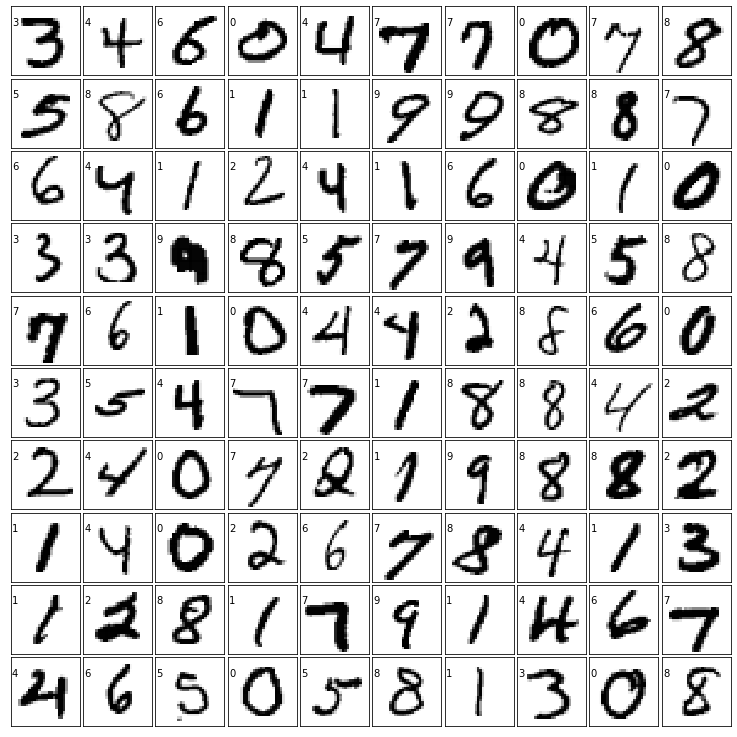

In [33]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_test[i]))

## **Classify with MLP**

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier


# train the model
#clf = GaussianNB()
#clf = LinearDiscriminantAnalysis()
#clf = KNeighborsClassifier(5)
#clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),n_estimators=200)
clf =  MLPClassifier(alpha=0.05, max_iter=3,solver='adam', random_state=1,
                hidden_layer_sizes=[100, 100],early_stopping=False,
                verbose=10, tol=0.00001)

print(clf.fit(X_train, y_train))
#print(clf.feature_importances_)  

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test


print("Score train = ",clf.score(X_train, y_train))
print("Score test  = ",clf.score(X_test, y_test))



Iteration 1, loss = 0.43324834
Iteration 2, loss = 0.19066049
Iteration 3, loss = 0.15167197
MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=3, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=1e-05,
              validation_fraction=0.1, verbose=10, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score train =  0.9735833333333334
Score test  =  0.964


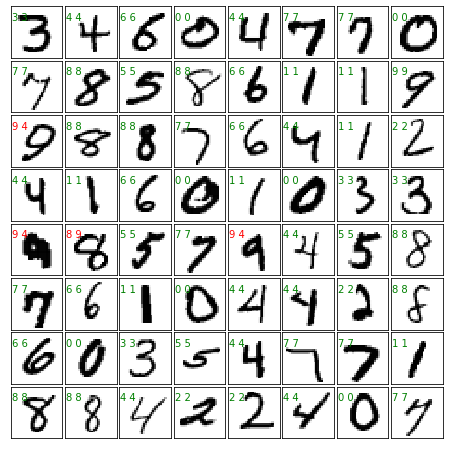

In [35]:
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='red')

**Number of true matches:**

In [36]:
matches = (predicted == expected)
print(matches.sum())

9640


The total number of data points



In [37]:
print(len(matches))

10000


And now, the ratio of correct predictions



In [38]:
matches.sum() / float(len(matches))

0.964

Print the classification report



In [39]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       995
           1       0.99      0.99      0.99      1126
           2       0.97      0.95      0.96       981
           3       0.97      0.95      0.96      1019
           4       0.93      0.98      0.96       949
           5       0.96      0.95      0.96       914
           6       0.95      0.99      0.97       979
           7       0.97      0.97      0.97      1094
           8       0.95      0.96      0.95       968
           9       0.96      0.94      0.95       975

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [40]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[ 961    0    2    1    2    3   12    3   10    1]
 [   0 1111    6    1    1    1    2    1    3    0]
 [   3    4  929    4   12    0    7    7   14    1]
 [   3    0    4  970    1   15    2    4   15    5]
 [   1    1    4    0  930    0    6    1    0    6]
 [   3    0    1    6    4  870   14    1    6    9]
 [   1    1    1    0    3    4  965    0    4    0]
 [   1    5    7    2   10    1    0 1058    0   10]
 [   1    2    1    8    3    5    7    4  928    9]
 [   2    1    0    6   32    6    0    8    2  918]]
